# **Import Libraries**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#warnings
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, skew, boxcox_normmax
from scipy.special import boxcox1p
from datetime import date
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [59]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [60]:
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
test_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [62]:
train_data.shape


(1460, 81)

In [63]:
test_data.shape


(1459, 80)

In [64]:
df=pd.concat([train_data, test_data], ignore_index=True)
data=df.copy()



In [65]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [66]:
df.shape


(2919, 81)

In [67]:
df.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [69]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [70]:
train_data.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


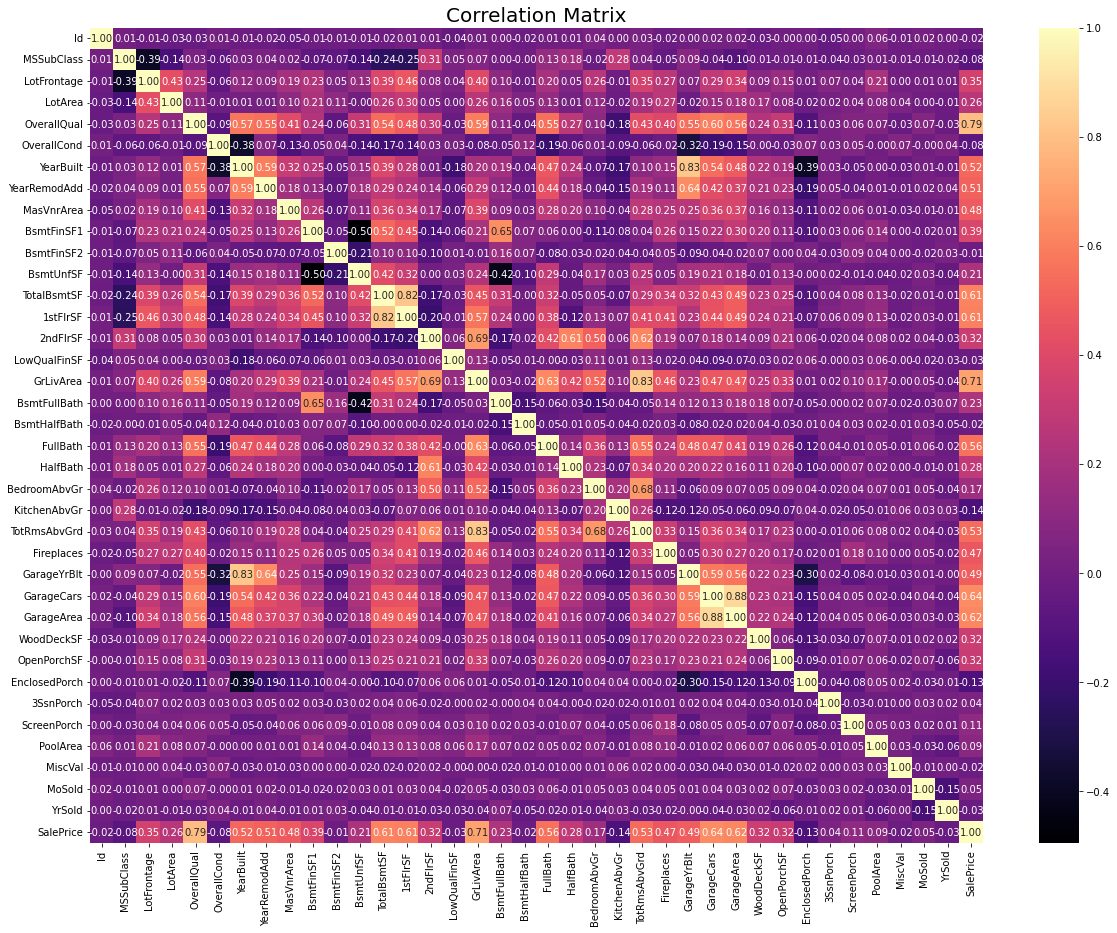

In [71]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [72]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

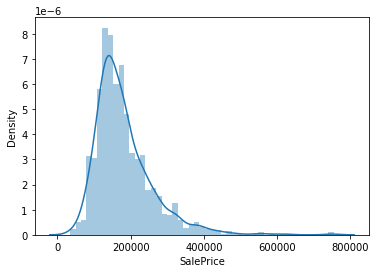

In [73]:
sns.distplot(df[df['SalePrice'].notnull()]['SalePrice'])

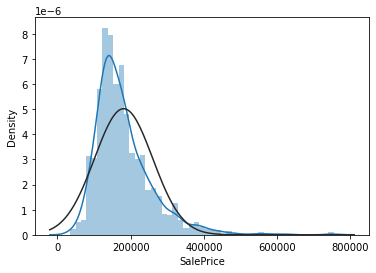

In [74]:
sns.distplot(df[df['SalePrice'].notnull()]['SalePrice'], fit=norm)

In [75]:
df['SalePrice']=np.log1p(df['SalePrice'])


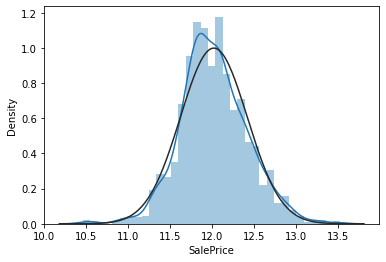

In [76]:
sns.distplot(df[df['SalePrice'].notnull()]['SalePrice'], fit=norm)


# **Numeric and categorical variables**

In [77]:
num_cols=list(df._get_numeric_data().columns)
num_cols.remove('Id')
print(f"Numeric variable numbers: {len(num_cols)}")

Numeric variable numbers: 34


In [78]:
def hist_for_nums(df, numeric_cols):
    for col in numeric_cols:
        df[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()

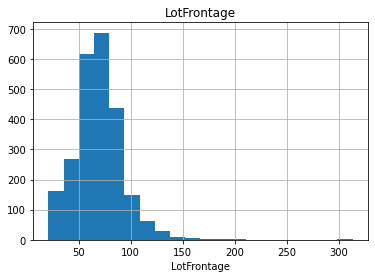

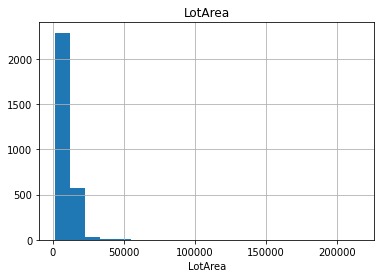

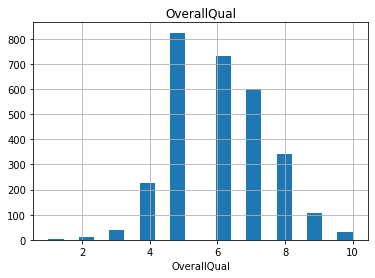

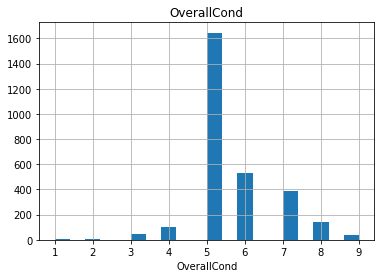

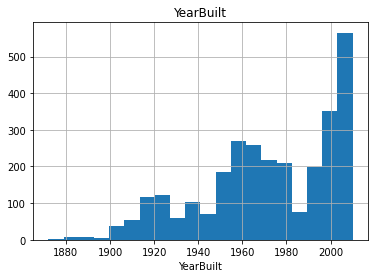

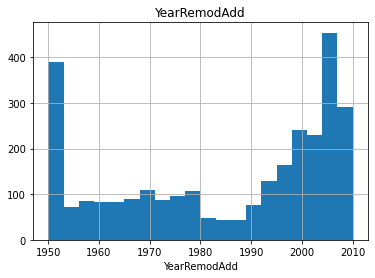

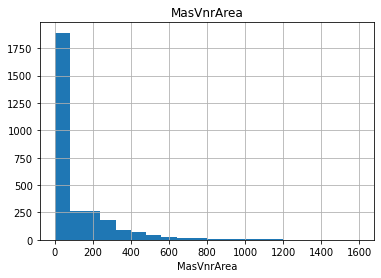

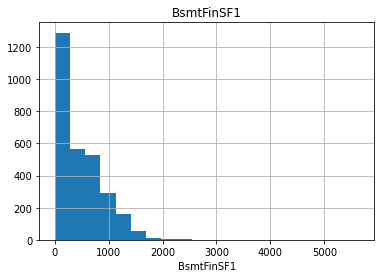

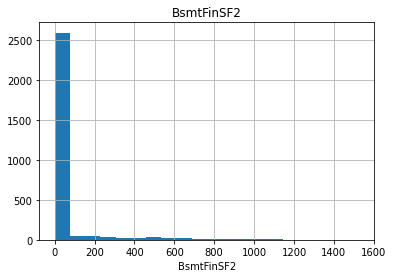

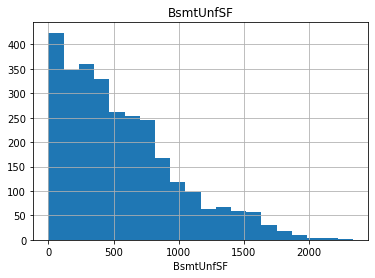

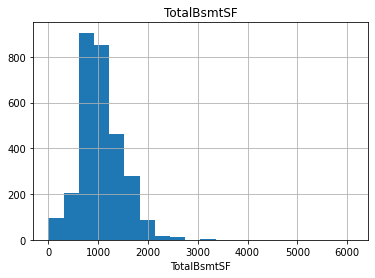

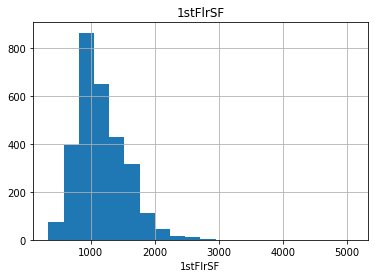

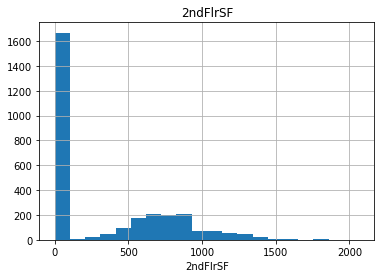

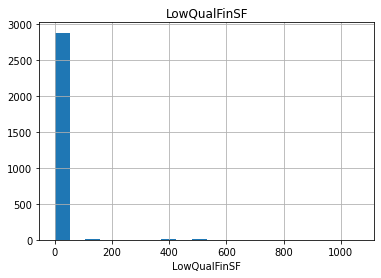

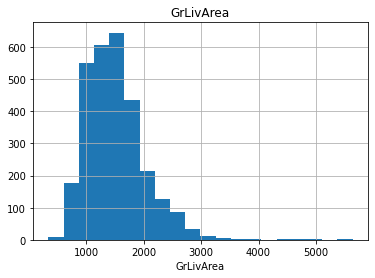

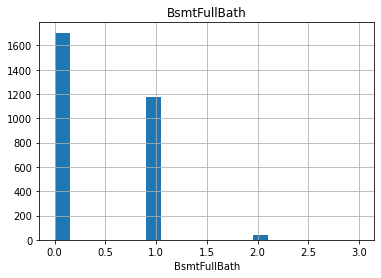

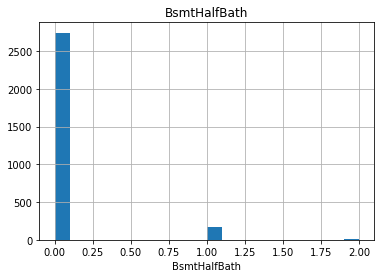

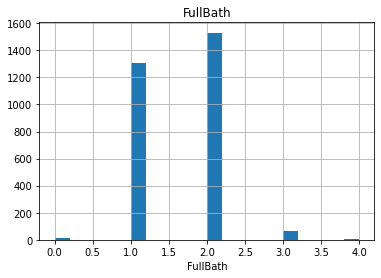

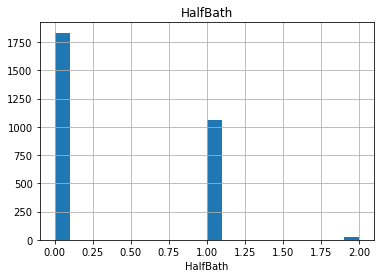

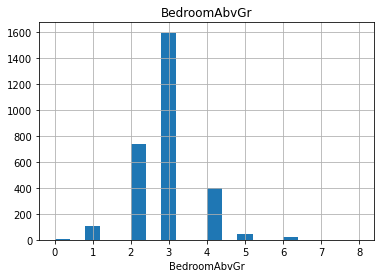

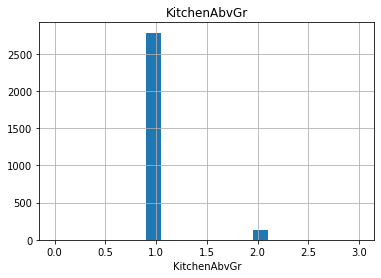

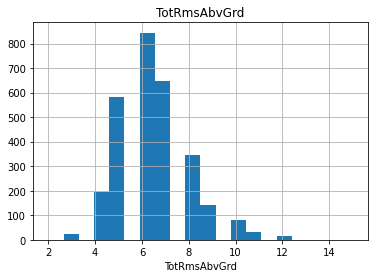

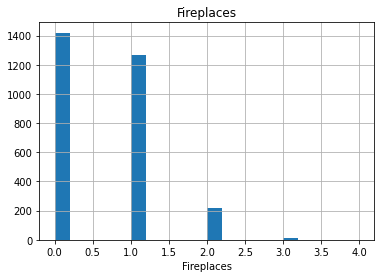

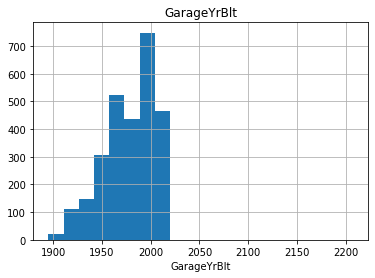

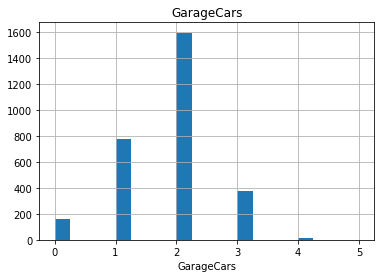

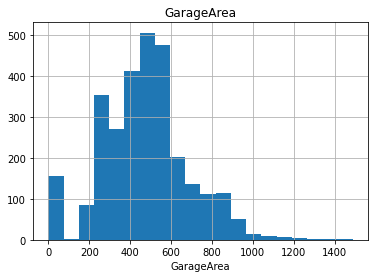

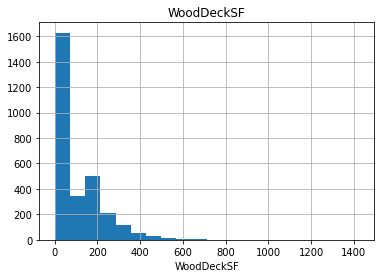

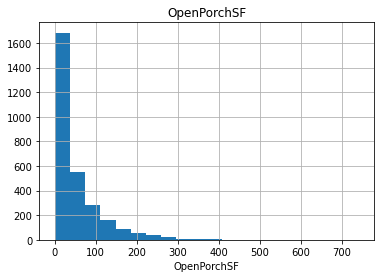

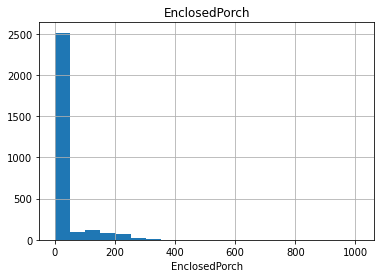

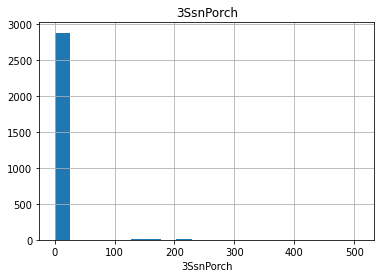

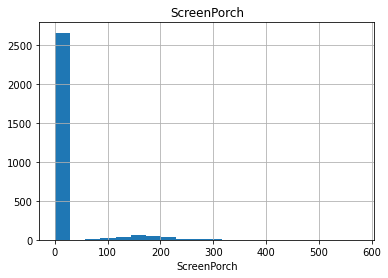

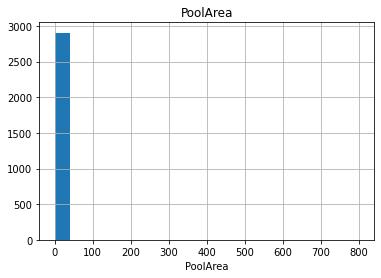

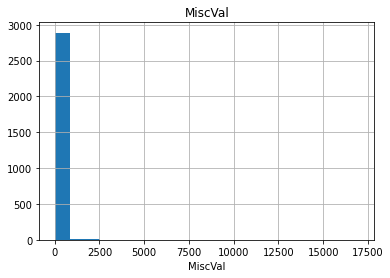

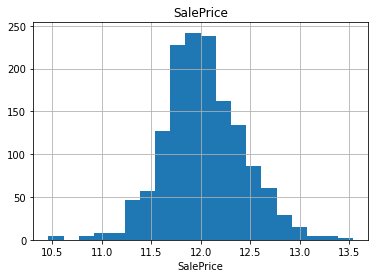

In [79]:
hist_for_nums(df, num_cols)


In [80]:
cat_cols=list(set(df.columns)-set(num_cols))
print('Categorical Features:{}'.format(len(cat_cols)))

Categorical Features:47


In [81]:
df[cat_cols].nunique()


SaleCondition       6
GarageCond          5
LandContour         4
BldgType            5
Condition1          9
BsmtQual            4
Id               2919
SaleType            9
GarageType          6
BsmtExposure        4
Electrical          5
Street              2
LotConfig           5
Neighborhood       25
FireplaceQu         5
GarageFinish        3
Alley               2
YrSold              5
BsmtFinType1        6
LandSlope           3
Exterior2nd        16
Foundation          6
HouseStyle          8
CentralAir          2
BsmtFinType2        6
MiscFeature         4
LotShape            4
BsmtCond            4
Utilities           2
Functional          7
MSZoning            5
PavedDrive          3
Exterior1st        15
RoofMatl            8
Fence               4
HeatingQC           5
GarageQual          5
Heating             6
PoolQC              3
ExterCond           5
RoofStyle           6
MoSold             12
Condition2          8
MasVnrType          4
ExterQual           4
KitchenQua

In [82]:
for cat in cat_cols:
    print(f'##########{cat}##########')
    print(df[cat].value_counts(normalize=True))

##########SaleCondition##########
Normal     0.822885
Partial    0.083933
Abnorml    0.065091
Family     0.015759
Alloca     0.008222
AdjLand    0.004111
Name: SaleCondition, dtype: float64
##########GarageCond##########
TA    0.961594
Fa    0.026812
Gd    0.005435
Po    0.005072
Ex    0.001087
Name: GarageCond, dtype: float64
##########LandContour##########
Lvl    0.898253
HLS    0.041110
Bnk    0.040082
Low    0.020555
Name: LandContour, dtype: float64
##########BldgType##########
1Fam      0.830764
TwnhsE    0.077766
Duplex    0.037342
Twnhs     0.032888
2fmCon    0.021240
Name: BldgType, dtype: float64
##########Condition1##########
Norm      0.860226
Feedr     0.056184
Artery    0.031518
RRAn      0.017129
PosN      0.013361
RRAe      0.009592
PosA      0.006852
RRNn      0.003083
RRNe      0.002055
Name: Condition1, dtype: float64
##########BsmtQual##########
TA    0.452079
Gd    0.426004
Ex    0.090909
Fa    0.031008
Name: BsmtQual, dtype: float64
##########Id##########
1       

# **Outliers**

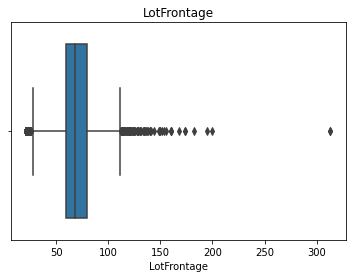

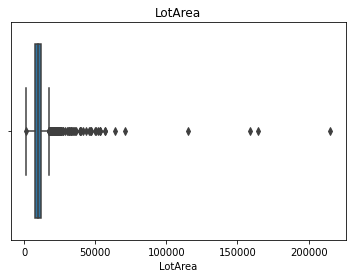

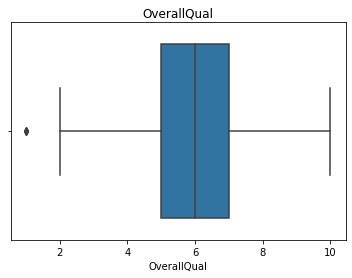

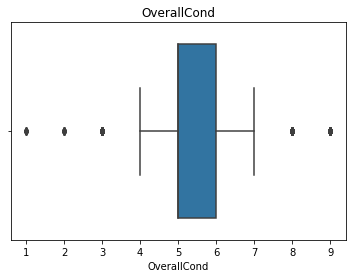

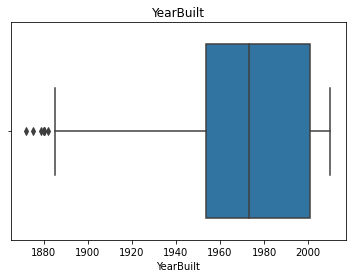

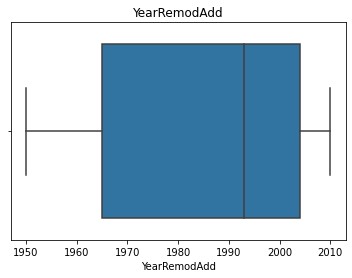

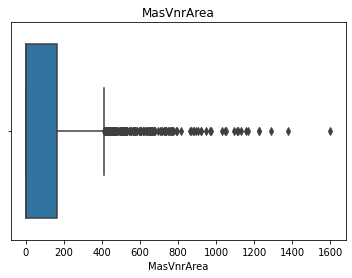

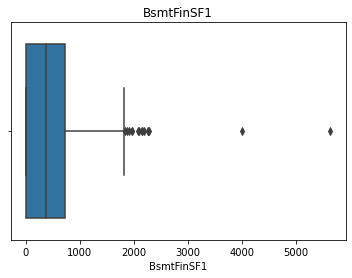

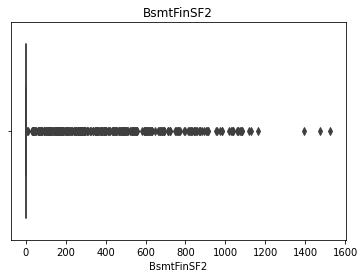

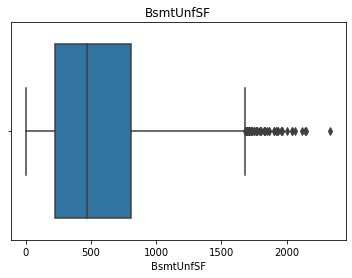

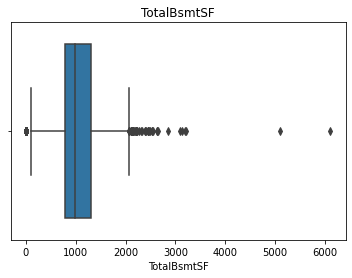

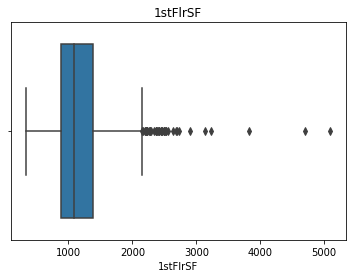

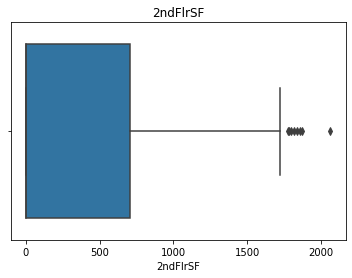

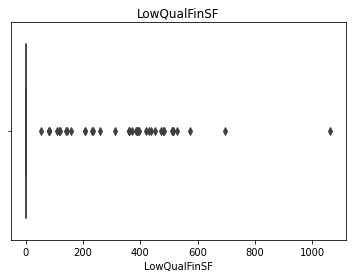

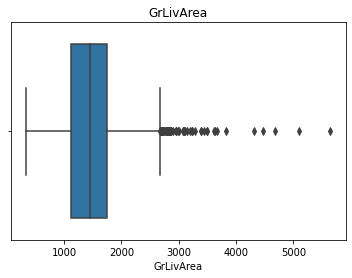

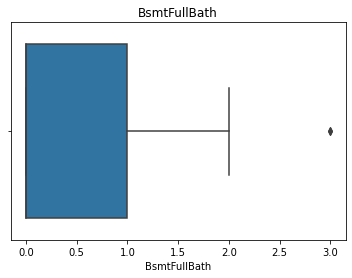

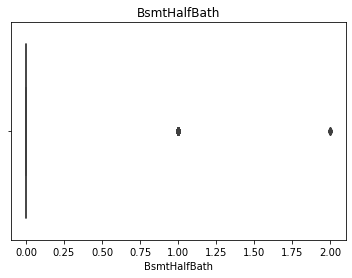

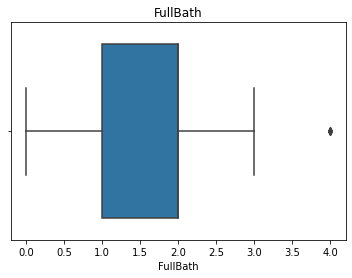

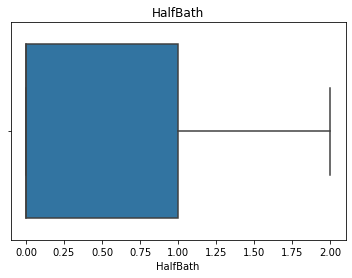

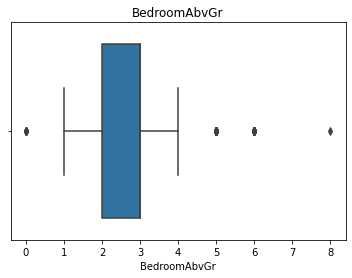

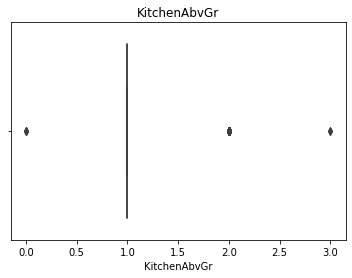

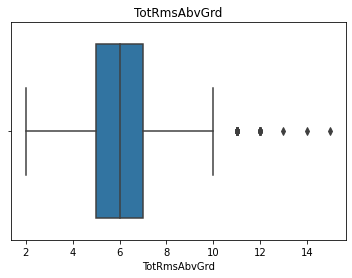

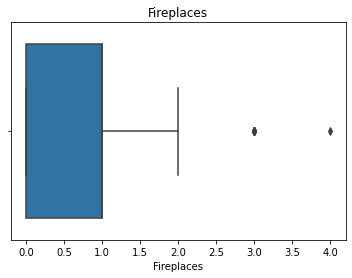

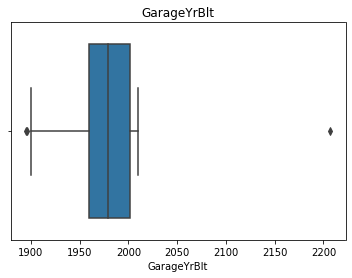

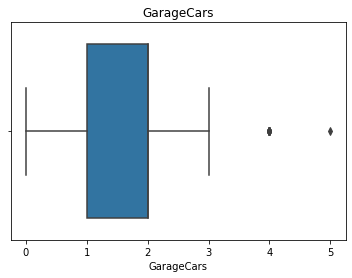

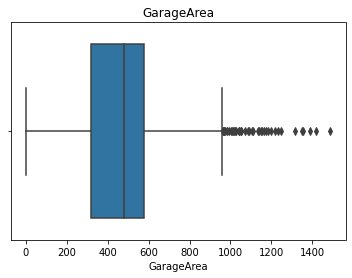

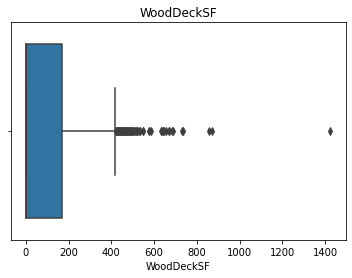

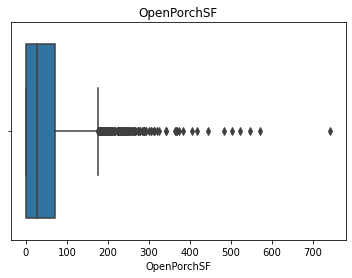

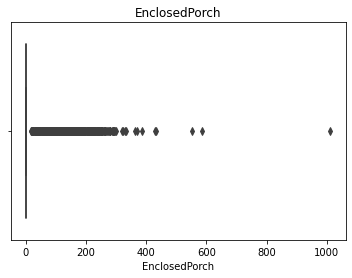

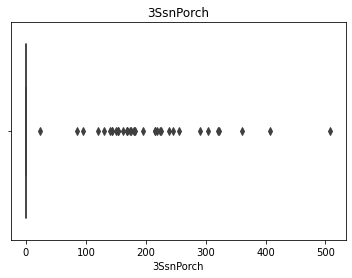

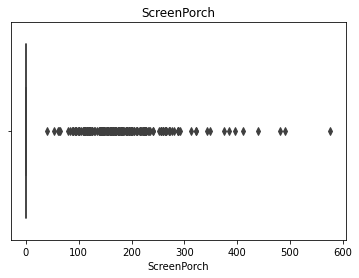

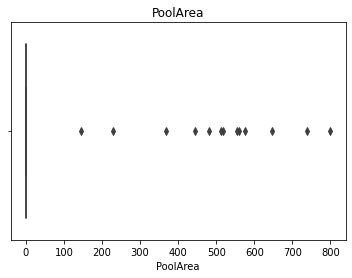

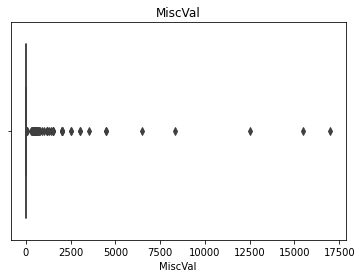

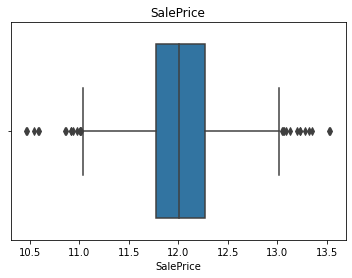

In [83]:
for col in num_cols:
  plt.title(col)
  sns.boxplot(df[col])
  plt.show()

In [84]:
def outliers(df,col):
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df.loc[(df[col]<lower_bound), col ]=lower_bound
  df.loc[(df[col]>upper_bound), col ]=upper_bound
  return df

In [85]:
for col in num_cols:
    df=outliers(df, col)

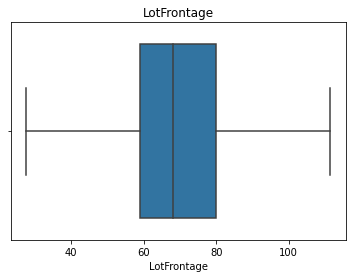

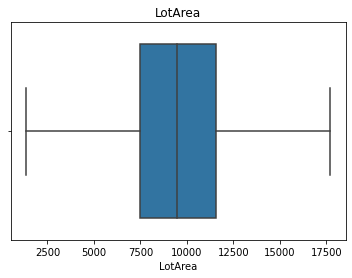

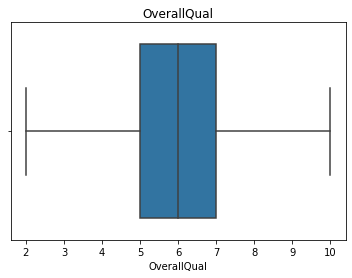

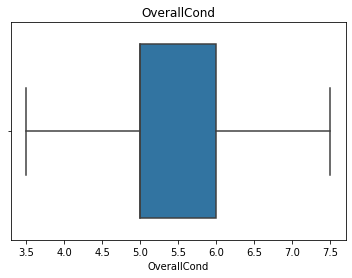

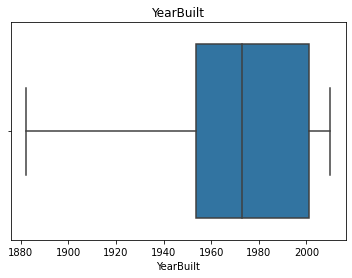

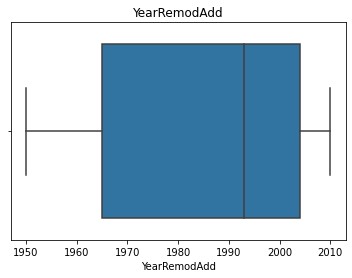

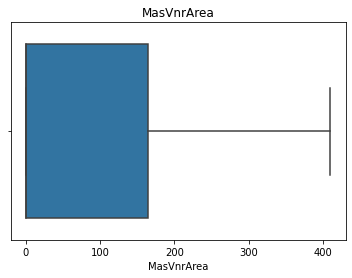

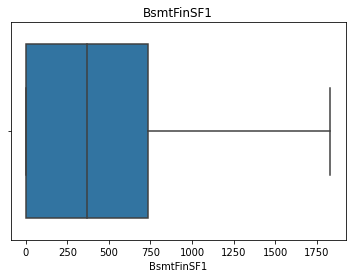

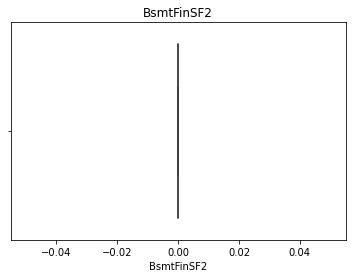

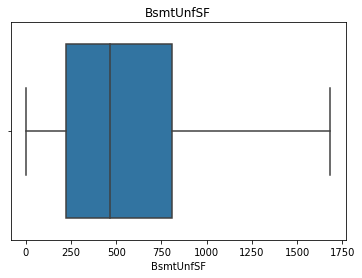

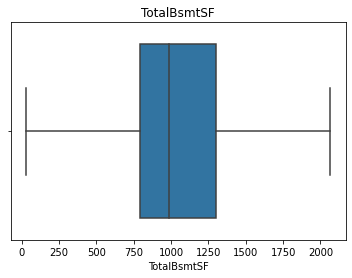

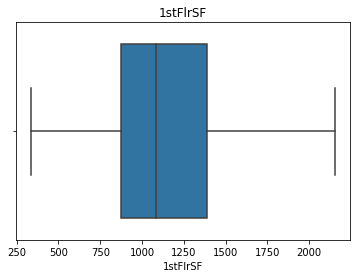

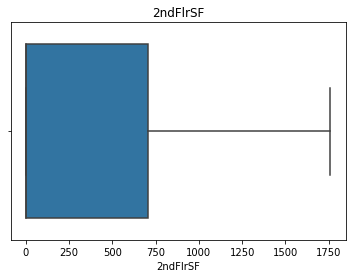

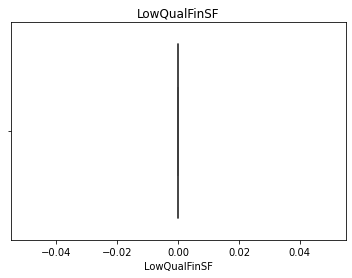

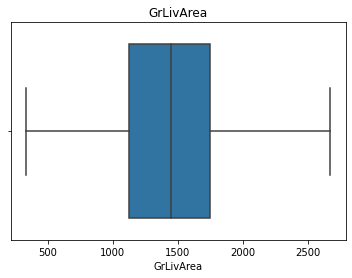

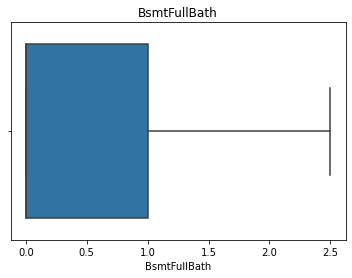

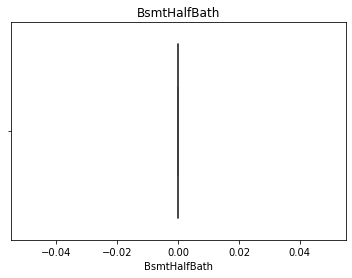

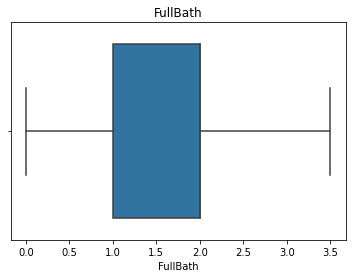

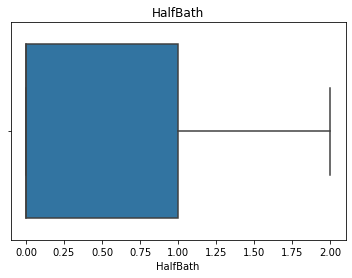

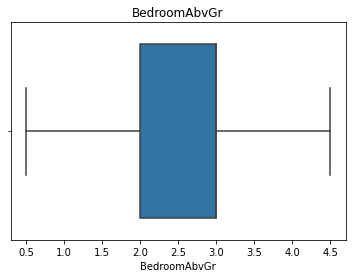

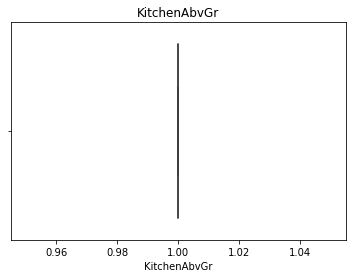

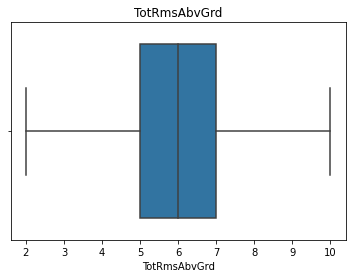

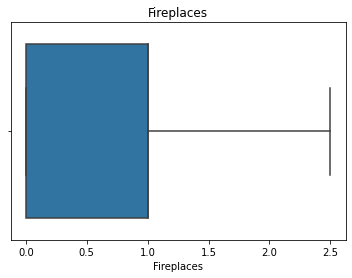

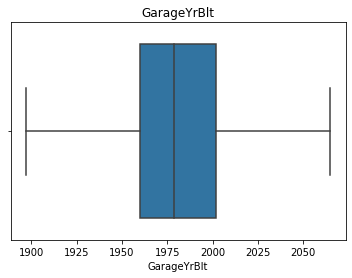

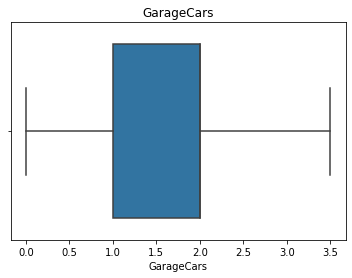

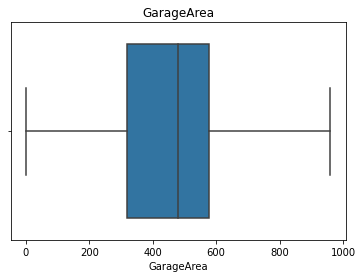

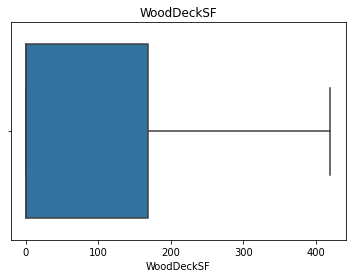

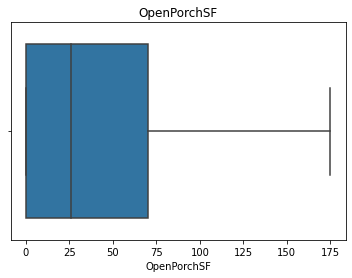

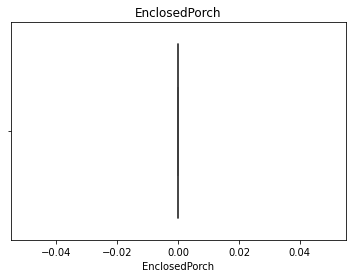

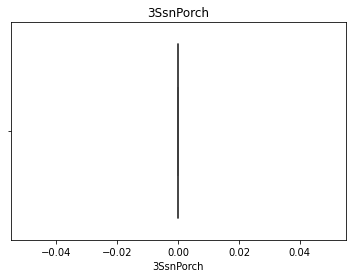

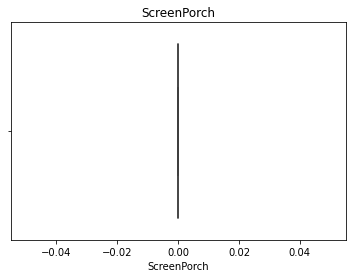

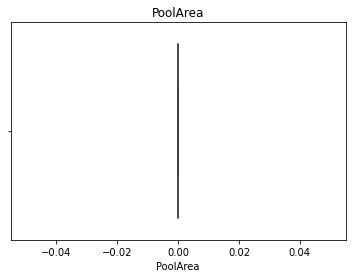

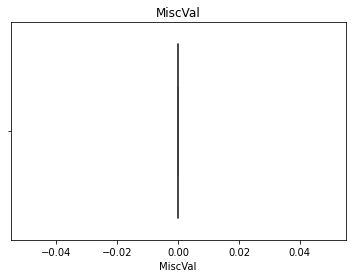

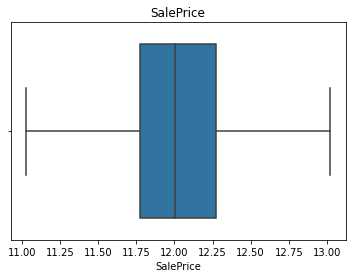

In [86]:
for col in num_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

# **Missing Values**

In [87]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [88]:
df.shape

(2919, 81)

In [89]:
df.columns[data.isnull().any()]


Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

In [90]:
df["Functional"].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [91]:
df['Functional']=df['Functional'].fillna('Typ')


In [92]:
df["PoolQC"].value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [93]:
df['PoolQC']=df['PoolQC'].fillna('None')


In [94]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df[col]=df[col].fillna(0)

In [95]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col]=df[col].fillna('None')

In [96]:
for col in ['BsmtQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col]=df[col].fillna('None')

In [97]:
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].apply(lambda x: x.fillna(x.mode()[0]))


In [98]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


In [99]:
for col in num_cols:
    if col=='SalePrice':
        pass
    else:  
        df[col].fillna(df[col].mean(), inplace=True)

In [100]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [101]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [102]:
data.columns[data.isnull().any()]


Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

In [106]:
df.drop('SalePrice', axis=1).isnull().sum().sum()

0

In [104]:
df.columns[data.isnull().any()]


Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

In [107]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

Encode categorical features
# **bold text**

In [108]:
df=pd.get_dummies(df, drop_first=True)


In [109]:
df.head()


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,6,7.5,1976.0,1976.0,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,7,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,7,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,8,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [110]:
train=df[df['SalePrice'].notnull()].drop('Id', axis=1)
test=df[df['SalePrice'].isnull()].drop('SalePrice', axis=1)

In [111]:
train.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,7.5,1976.0,1976.0,0.0,978.0,0.0,284.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,0,0,0,0,1,0,0,0,1,0


In [112]:
test.head()


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,80.0,11622,5,6.0,1961.0,1961.0,0.0,468.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1461,1462,81.0,14267,6,6.0,1958.0,1958.0,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1462,1463,74.0,13830,5,5.0,1997.0,1998.0,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1463,1464,78.0,9978,6,6.0,1998.0,1998.0,20.0,602.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1464,1465,43.0,5005,8,5.0,1992.0,1992.0,0.0,263.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [113]:
X = train.drop(["SalePrice"], axis=1)
Y=train[['SalePrice']]

# **Modelling**

In [114]:
def model_tuning(X, Y, algo, algo_cv, grid, split_share=0.20, cv=10):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=split_share)
    model_cv=algo_cv(alphas=grid, cv=cv)
    model_cv.fit(X_train, Y_train)
    model_tuned=algo(alpha=model_cv.alpha_)
    model_tuned.fit(X_train, Y_train)
    train_rmse=np.sqrt(mean_squared_error(Y_train, model_tuned.predict(X_train)))
    test_rmse=np.sqrt(mean_squared_error(Y_test, model_tuned.predict(X_test)))
    return (type(algo()).__name__, train_rmse, test_rmse) 

In [115]:
models={Ridge: RidgeCV, Lasso:LassoCV, ElasticNet:ElasticNetCV}
results_tuned={'model':[], 'train_rmse':[], 'test_rmse':[]}
alphas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 5e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]

In [116]:
for model in models:
    res=model_tuning(X, Y, model, models[model], alphas)
    results_tuned['model'].append(res[0])
    results_tuned['train_rmse'].append(res[1])
    results_tuned['test_rmse'].append(res[2])

In [117]:
results_tuned=pd.DataFrame(results_tuned)
results_tuned

,model,train_rmse,test_rmse
0,Ridge,0.097900,0.118023
1,Lasso,0.105803,0.117659
2,ElasticNet,0.100093,0.119128
